Из списка датасетов был выбран «Mushroom Dataset (Binary Classification)». Датасет показывает набор данных о грибах (в двоичной классификации).

Этот набор данных содержит следующие атрибуты:
•	Cap Diameter - диаметр шляпки
•	Cap Shape - форма шляпки
•	Gill Attachment - прикрепление с помощью жабр
•	Gill Color - цвет жабр
•	Stem Height - длина стебля
•	Stem Width - ширина стебля
•	Stem Color - цвет стебля
•	Season - сезон
•	Target Class - Is it edible or not? - целевой класс - съедобен или нет?

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, f1_score, RocCurveDisplay
import pydotplus
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image, display

df = pd.read_csv('mushroom_cleaned.csv')
df.head(7)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1


In [35]:
def detect_and_visualize_outliers_horizontal(df):
    # Выбор числовых столбцов 
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    if len(numeric_cols) == 0:
        print("Нет числовых столбцов для визуализации.")
        return

    num_cols = len(numeric_cols)
    num_rows = (num_cols // 4) + (num_cols % 4 > 0)  
    plt.figure(figsize=(15, num_rows * 4))

    for i, col in enumerate(numeric_cols):
        plt.subplot(num_rows, 4, i + 1)  # Определяем строки и столбцы
        sns.boxplot(y=df[col], width=0.3) 
        plt.title(f'Ящичный график:\n{col}')

    plt.tight_layout()
    plt.show()

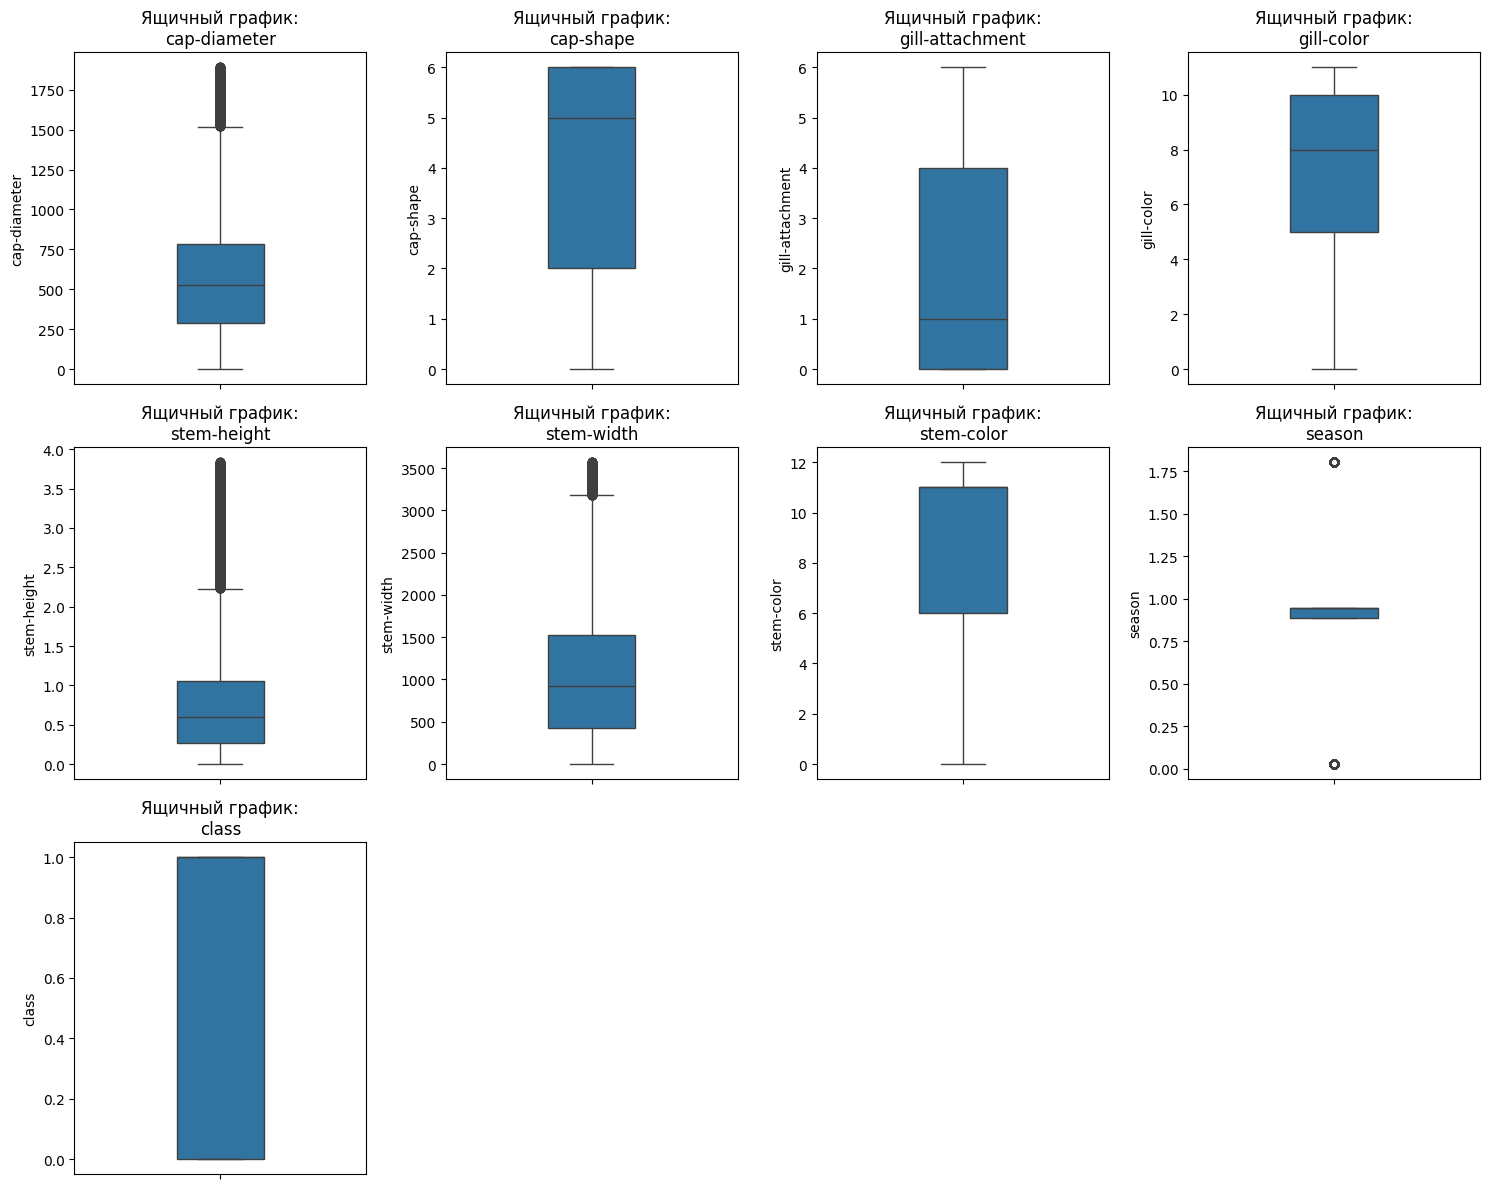

In [36]:
detect_and_visualize_outliers_horizontal(df)

In [37]:
np.count_nonzero(y == 1)

29675

In [38]:
np.count_nonzero(y == 0)

24360

In [39]:
X_train, X_hold, y_train, y_hold = train_test_split(x, y, test_size=0.3, random_state=17)

In [40]:
tree = DecisionTreeClassifier(random_state=17)
np.mean(cross_val_score(tree, X_train, y_train, cv=5))

np.float64(0.9746192857739533)

In [41]:
knn = KNeighborsClassifier()
np.mean(cross_val_score(knn, X_train, y_train, cv=5))

np.float64(0.7033896500031631)

In [42]:
tree_params = {'max_depth': np.arange(1, 11), 'min_samples_split': [2, 5, 10]}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': [2, 5, 10]})

In [43]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': np.int64(10), 'min_samples_split': 10},
 np.float64(0.9027074677665766))

In [44]:
knn_params = {"n_neighbors": [1, 2, 3, 4] + list(range(5, 30, 5))}
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20, 25]})

In [45]:
tree_pred = tree_grid.predict(X_hold)
knn_pred = knn_grid.predict(X_hold)

In [46]:
knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 1}, np.float64(0.709681760368364))

In [47]:
accuracy_score(y_hold, tree_pred)

0.9072234902226883

In [48]:
accuracy_score(y_hold, knn_pred)

0.7232126333970761

In [49]:
precision_score(y_hold, tree_pred)

np.float64(0.9418411037107517)

In [50]:
precision_score(y_hold, knn_pred)

np.float64(0.7501406232422094)

In [51]:
recall_score(y_hold, tree_pred)

np.float64(0.8863890754421312)

In [52]:
recall_score(y_hold, knn_pred)

np.float64(0.7463622117752406)

In [53]:
f1_score(y_hold, tree_pred)

np.float64(0.9132741321646869)

In [54]:
f1_score(y_hold, knn_pred)

np.float64(0.7482466475901924)

In [55]:
tree_pred_proba = tree_grid.predict_proba(X_hold)
tree_pred_proba

array([[0.95384615, 0.04615385],
       [0.04390526, 0.95609474],
       [0.98497496, 0.01502504],
       ...,
       [0.38912732, 0.61087268],
       [0.04390526, 0.95609474],
       [0.7027907 , 0.2972093 ]])

In [56]:
knn_pred_proba = knn_grid.predict_proba(X_hold)
knn_pred_proba

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

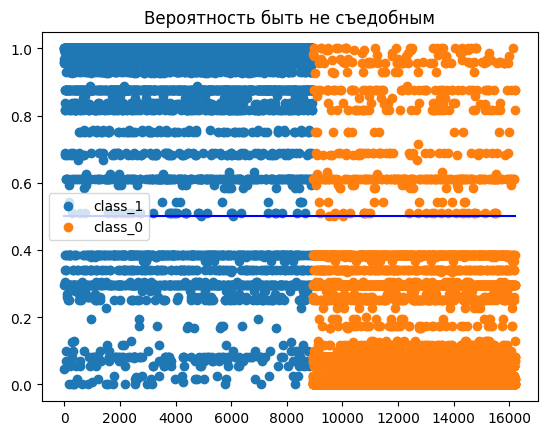

In [57]:
threshold = 0.5

class_1_probs = tree_pred_proba[:, 1][y_hold == 1]  
class_0_probs = tree_pred_proba[:, 1][y_hold == 0]  

indices_class_1 = np.arange(len(class_1_probs))
indices_class_0 = np.arange(len(class_1_probs), len(class_1_probs) + len(class_0_probs))

# Построение точечного графика для классов
plt.scatter(indices_class_1, class_1_probs, label='class_1')
plt.scatter(indices_class_0, class_0_probs, label='class_0')

# Линия порога
plt.plot([-0.2, len(tree_pred_proba[:, 1])], [threshold, threshold], color='b')

plt.title('Вероятность быть не съедобным')
plt.legend()
plt.show()

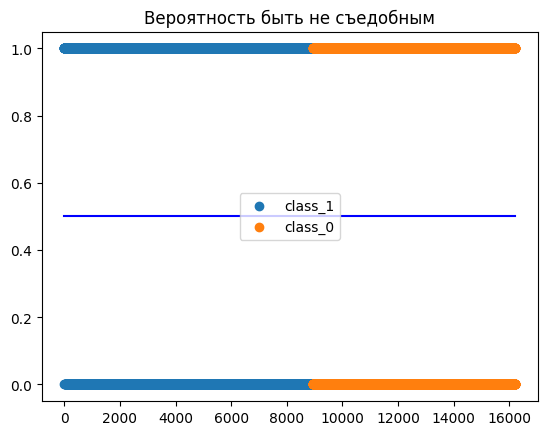

In [58]:
threshold = 0.5

class_1_probs = knn_pred_proba[:, 1][y_hold == 1] 
class_0_probs = knn_pred_proba[:, 1][y_hold == 0]  

indices_class_1 = np.arange(len(class_1_probs))
indices_class_0 = np.arange(len(class_1_probs), len(class_1_probs) + len(class_0_probs))

# Построение точечного графика для классов
plt.scatter(indices_class_1, class_1_probs, label='class_1')
plt.scatter(indices_class_0, class_0_probs, label='class_0')

# Линия порога
plt.plot([-0.2, len(knn_pred_proba[:, 1])], [threshold, threshold], color='b')

plt.title('Вероятность быть не съедобным')
plt.legend()
plt.show()

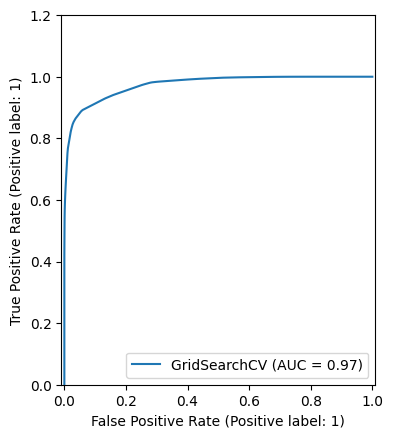

In [59]:
RocCurveDisplay.from_estimator(tree_grid, X_train, y_train)
plt.ylim([0, 1.2]);

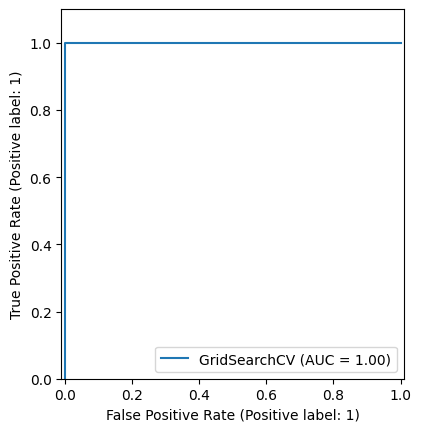

In [60]:
RocCurveDisplay.from_estimator(knn_grid, X_train, y_train)
plt.ylim([0, 1.1]);

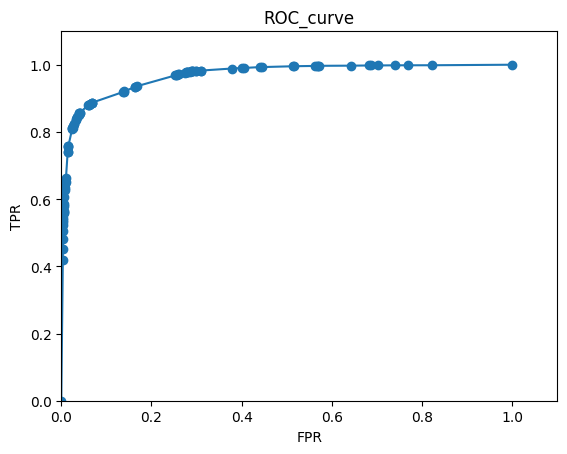

In [61]:
fprs, tprs, thr = roc_curve(y_hold, tree_pred_proba[:, 1])

plt.plot(fprs, tprs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

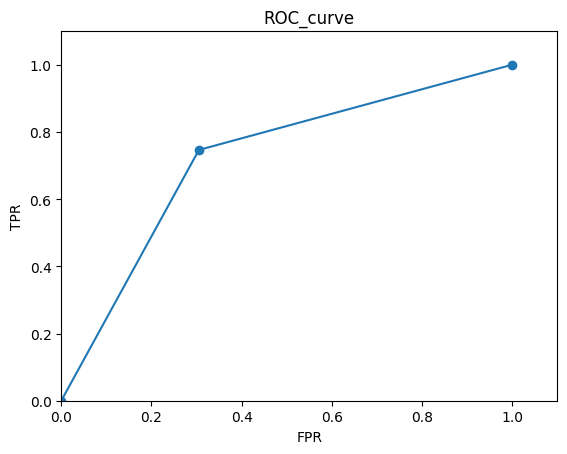

In [62]:
fprs, tprs, thr = roc_curve(y_hold, knn_pred_proba[:, 1])

plt.plot(fprs, tprs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

In [63]:
"""from sklearn.model_selection import cross_val_score

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))
    knn.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_hold, knn.predict(X_hold)))

plt.plot(n_neighb, cv_scores, label='CV')
plt.plot(n_neighb, holdout_scores, label='holdout')
plt.title('Easy task. kNN fails')
plt.legend();"""

"from sklearn.model_selection import cross_val_score\n\ncv_scores, holdout_scores = [], []\nn_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))\n\nfor k in n_neighb:\n\n    knn = KNeighborsClassifier(n_neighbors=k)\n    cv_scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))\n    knn.fit(X_train, y_train)\n    holdout_scores.append(accuracy_score(y_hold, knn.predict(X_hold)))\n\nplt.plot(n_neighb, cv_scores, label='CV')\nplt.plot(n_neighb, holdout_scores, label='holdout')\nplt.title('Easy task. kNN fails')\nplt.legend();"

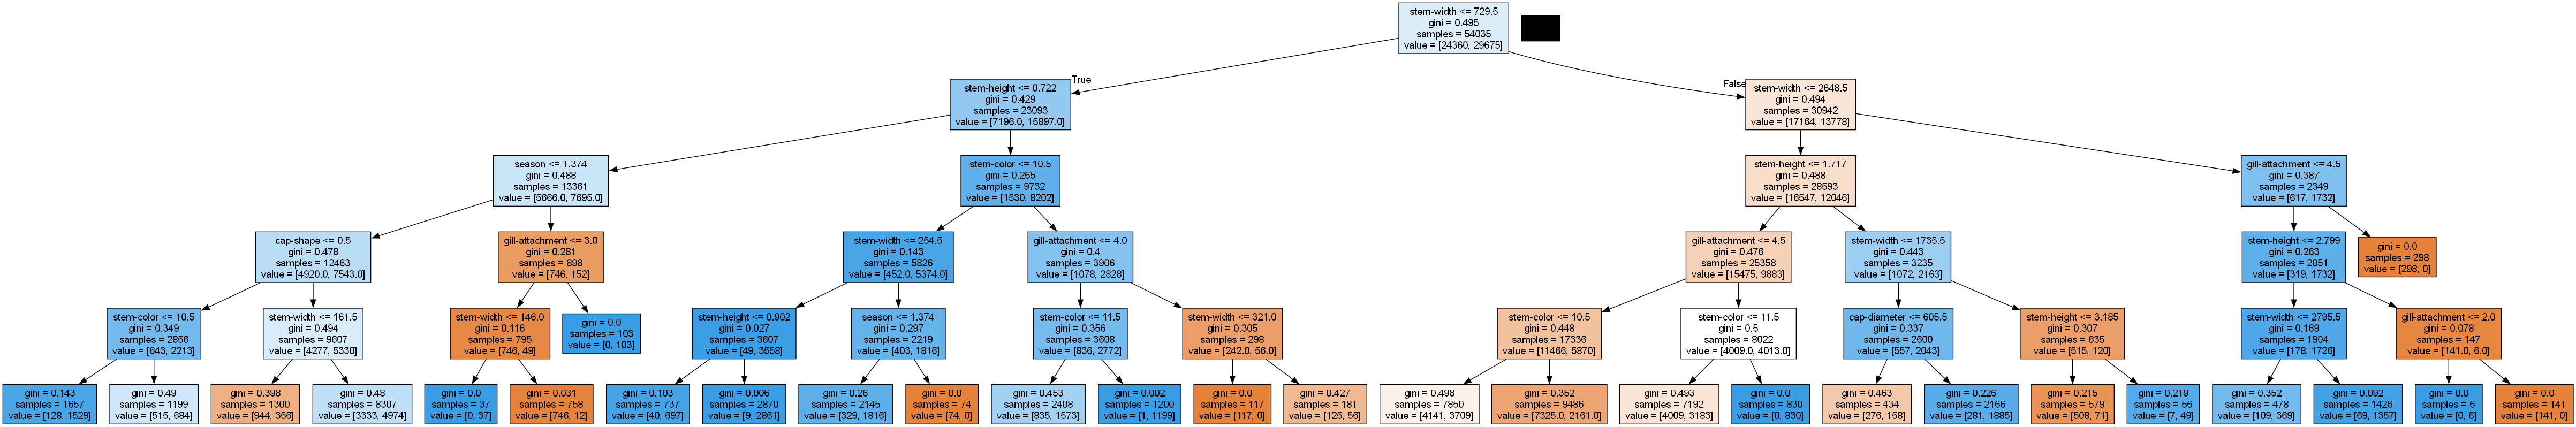

In [64]:
data = pd.read_csv('mushroom_cleaned.csv')

X = data.drop('class', axis=1) 
y = data['class']  

tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
tree.fit(X, y)

dot_data = StringIO()
export_graphviz(tree, feature_names=X.columns, out_file=dot_data, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

display(Image(graph.create_png()))